In [1]:

import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding=('ISO-8859-1'), low_memory=False)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
import missingno as msno

<Axes: >

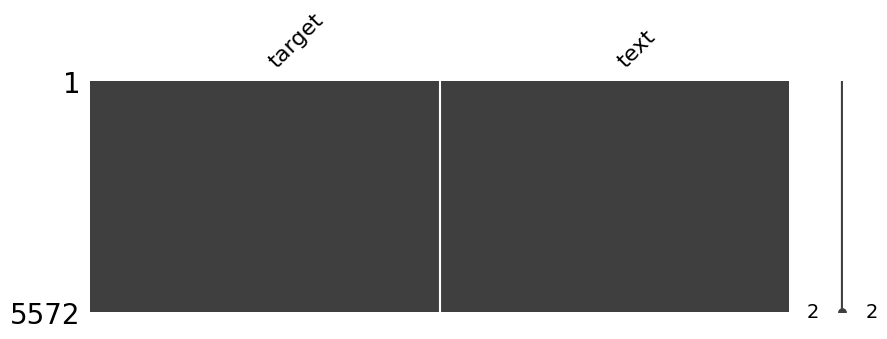

In [16]:
msno.matrix(df, figsize=(10,3))

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

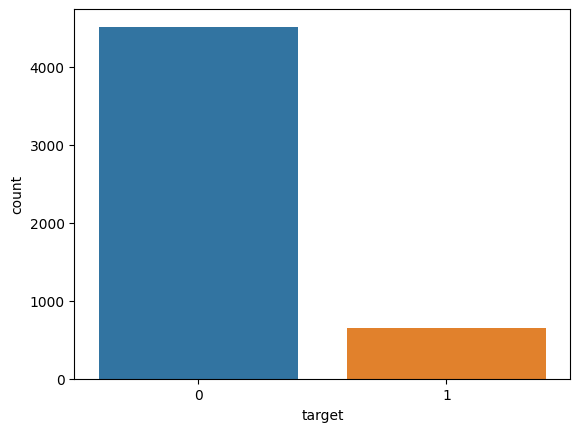

In [21]:

sns.countplot(x='target', data=df)

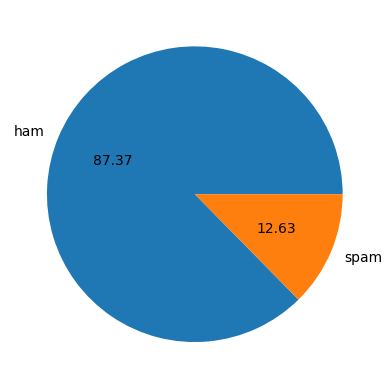

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Number Of Characters

In [25]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [26]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Number Of Words

In [29]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [30]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [31]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## Number Of Sentences

In [33]:
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [34]:
df['number_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[df['target']==0][['num_characters','num_words','number_sentences']].describe()

,num_characters,num_words,number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target']==1][['num_characters','num_words','number_sentences']].describe()

,num_characters,num_words,number_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

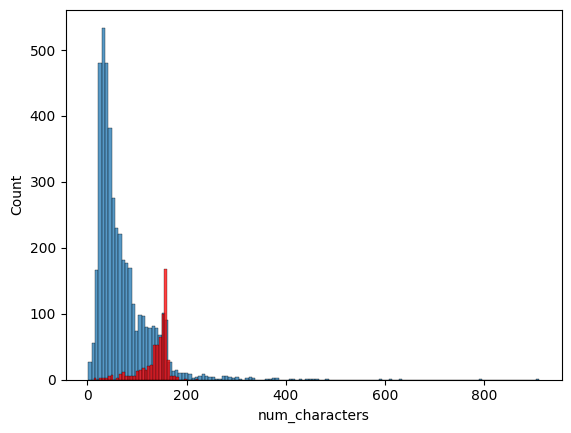

In [38]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

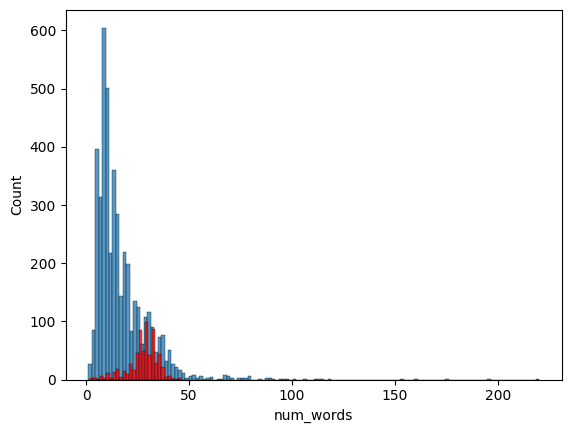

In [39]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')


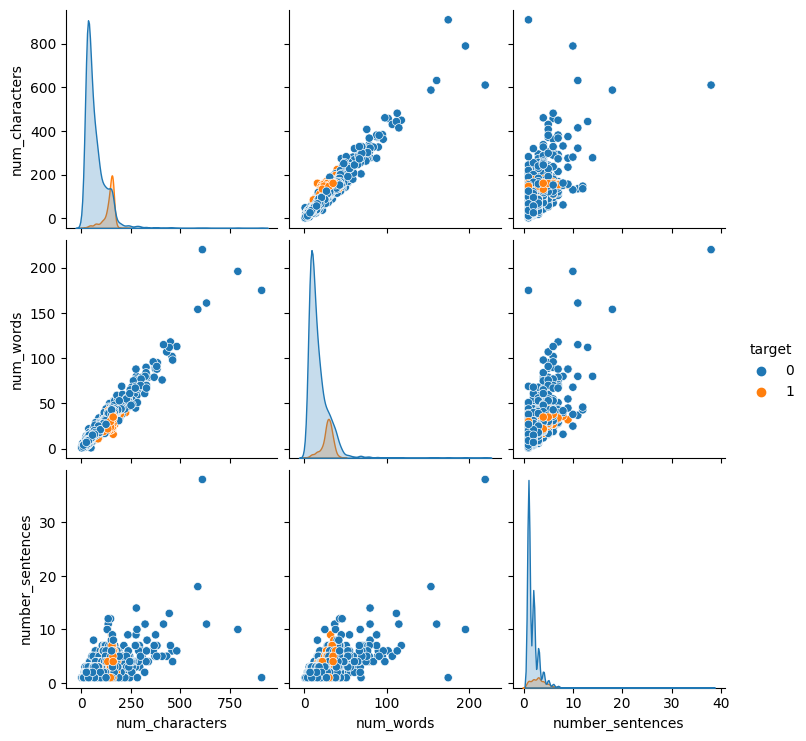

In [40]:
sns.pairplot(df, hue='target')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

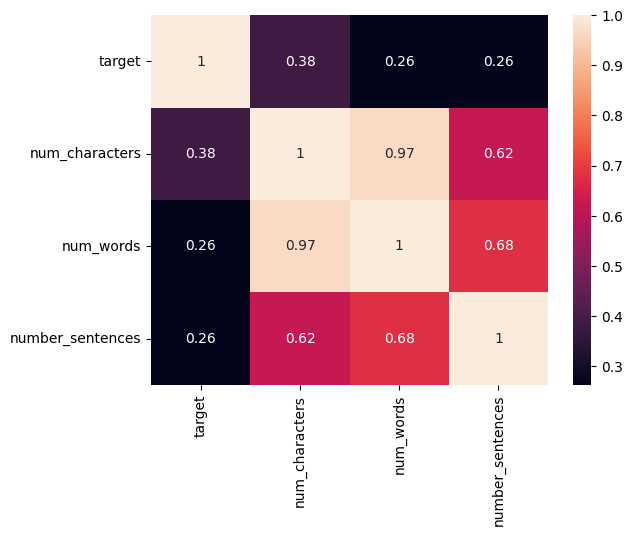

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='num_characters', ylabel='num_words'>

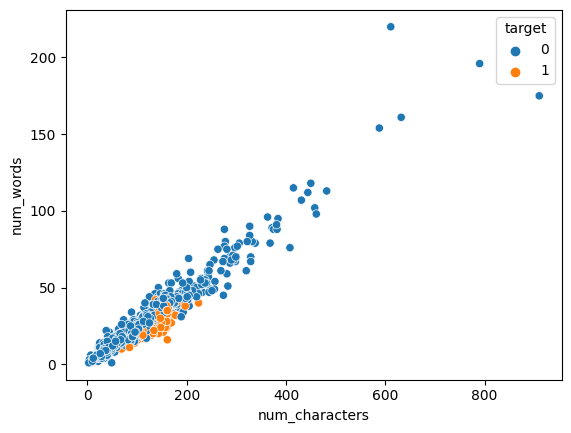

In [ ]:
sns.scatterplot(x='num_characters',y='num_words',data=df, hue='target')

In [41]:
#from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
#For TESTING WORKInG OF STEMMER
ps.stem('waiting')

'wait'

In [45]:
def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [46]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,number_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfid = TfidfVectorizer(max_features=3000)

In [51]:
X_tfidf = tfid.fit_transform(df['transformed_text']).toarray()

In [52]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_tfidf = df['target'].values

In [ ]:
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y_tfidf, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def evaluate_model(predictions, model_name):
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

evaluate_model(dt_predictions, "Decision Tree")
evaluate_model(nb_predictions, "Naive Bayes")
evaluate_model(rf_predictions, "Random Forest")
evaluate_model(svm_predictions, "SVM")

Confusion Matrix for Decision Tree:
[[868  28]
 [ 29 109]]
Accuracy for Decision Tree: 0.94
Confusion Matrix for Naive Bayes:
[[788 108]
 [ 27 111]]
Accuracy for Naive Bayes: 0.87
Confusion Matrix for Random Forest:
[[893   3]
 [ 25 113]]
Accuracy for Random Forest: 0.97
Confusion Matrix for SVM:
[[894   2]
 [ 26 112]]
Accuracy for SVM: 0.97


In [53]:
final_df=df[['transformed_text','target']]

In [54]:
X=final_df["transformed_text"]

In [55]:
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [56]:
y=final_df["target"]

In [ ]:
# using Count vectorizer to vectorize the sentences
#from sklearn.feature_extraction.text import CountVectorizer
#countVect = CountVectorizer(min_df = 50, ngram_range = (1,2),strip_accents='unicode', binary=True)
#X_all_countVect = countVect.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# train test splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2,
                                                random_state=40)

In [59]:
from keras.preprocessing import sequence


In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, SpatialDropout1D
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:


# Tokenize and pad the text data
max_words = 10000  # Adjust based on your vocabulary size
max_sequence_length = 150  # Adjust based on your desired sequence length
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(Xtrain)

X_train_sequences = tokenizer.texts_to_sequences(Xtrain)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences = tokenizer.texts_to_sequences(Xtest)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Initialize RNN model with hidden layers
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(100, activation='tanh', return_sequences=True))
model.add(SimpleRNN(100, activation='tanh', return_sequences=True))
model.add(SimpleRNN(100, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(X_train_padded, Ytrain, epochs=5, batch_size=64, validation_split=0.1)  # Adding validation_split for monitoring validation performance

# Evaluate the model on test data
accuracy = model.evaluate(X_test_padded, Ytest)[1]
print(f"Test Accuracy: {accuracy}")



Epoch 1/5
59/59 [==============================] - 41s 635ms/step - loss: 0.2511 - accuracy: 0.9054 - val_loss: 0.1519 - val_accuracy: 0.9565
Epoch 2/5
59/59 [==============================] - 35s 587ms/step - loss: 0.0526 - accuracy: 0.9825 - val_loss: 0.1322 - val_accuracy: 0.9638
Epoch 3/5
59/59 [==============================] - 32s 540ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.1138 - val_accuracy: 0.9734
Epoch 4/5
59/59 [==============================] - 30s 497ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.1242 - val_accuracy: 0.9734
Epoch 5/5
33/33 [==============================] - 2s 74ms/step - loss: 0.0656 - accuracy: 0.9845
Test Accuracy: 0.9845260977745056


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
predictions=model.predict(X_test_padded)
predictions=[np.round(val[0]) for val in predictions]
print("CONFUSION MATRIX:")
print(confusion_matrix(Ytest,predictions))
print("ACCURACY:",accuracy_score(Ytest,predictions))
print("PRECISION:",precision_score(Ytest,predictions,average='macro'))
print("RECALL",recall_score(Ytest,predictions,average='macro'))
print("F1 SCORE",f1_score(Ytest,predictions,average='macro'))

33/33 [==============================] - 2s 39ms/step
CONFUSION MATRIX:
[[914   2]
 [ 14 104]]
ACCURACY: 0.9845261121856866
PRECISION: 0.9830229342875731
RECALL 0.9395862630449263
F1 SCORE 0.959947319491788


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Attention
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Attention, Input
from keras.models import Sequential, Model

In [ ]:

max_words = 10000  # Adjust based on your vocabulary size
max_sequence_length = 150  # Adjust based on your desired sequence length
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(Xtrain)

X_train_sequences = tokenizer.texts_to_sequences(Xtrain)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences = tokenizer.texts_to_sequences(Xtest)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
# Initialize RNN model with attention layer
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(max_words, 128)(input_layer)
spatial_dropout = SpatialDropout1D(0.2)(embedding_layer)
lstm_layer = LSTM(100, activation='tanh', return_sequences=True)(spatial_dropout)
attention = Attention(use_scale=True)([lstm_layer, lstm_layer, lstm_layer ])  # Applying attention mechanism to LSTM output
merged_layer = Model(inputs=input_layer, outputs=attention)
dense_layer = Dense(1, activation='sigmoid')(merged_layer.output)

attention_model = Model(inputs=input_layer, outputs=dense_layer)

attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
attention_model.fit(X_train_padded, Ytrain, epochs=5, batch_size=64, validation_split=0.1)  # Adding validation_split for monitoring validation performance

# Evaluate the model on test data
accuracy = attention_model.evaluate(X_test_padded, Ytest)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
59/59 [==============================] - 17s 178ms/step - loss: 0.4080 - accuracy: 0.8737 - val_loss: 0.4418 - val_accuracy: 0.8430
Epoch 2/5
59/59 [==============================] - 5s 83ms/step - loss: 0.3798 - accuracy: 0.8737 - val_loss: 0.4357 - val_accuracy: 0.8430
Epoch 3/5
59/59 [==============================] - 4s 76ms/step - loss: 0.3665 - accuracy: 0.8745 - val_loss: 0.3776 - val_accuracy: 0.8430
Epoch 4/5
59/59 [==============================] - 3s 44ms/step - loss: 0.1258 - accuracy: 0.9636 - val_loss: 0.1096 - val_accuracy: 0.9677
Epoch 5/5
33/33 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 0.9860
Test Accuracy: 0.9859639406204224


In [62]:
# Importing libraries related to transfer learning
!pip install ktrain
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 52.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [63]:
# importing library
import ktrain
import random
import pickle
import torch
import time
import transformers
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras.utils as ku
import torch.nn as nn
from ktrain import text

In [64]:
device = torch.device("cuda")

In [ ]:
df

In [67]:
train_data = df

In [69]:

# Train test split with the help of BERT
(XTrain, YTrain) , (XTest, YTest), preprocess = text.texts_from_df(train_df= df,
                                                                       text_column= 'transformed_text',
                                                                       label_columns= 'target',
                                                                       maxlen = 100,
                                                                       preprocess_mode = 'bert')

['not_target', 'target']
      not_target  target
2132         0.0     1.0
3189         1.0     0.0
1729         1.0     0.0
3004         1.0     0.0
2140         1.0     0.0
['not_target', 'target']
      not_target  target
707          1.0     0.0
3918         1.0     0.0
625          1.0     0.0
1100         1.0     0.0
1789         1.0     0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [70]:
# Calling BERT and apply preprocessing using BERT
model = text.text_classifier(name='bert',
                             train_data = (XTrain, YTrain),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 100


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [81]:
learner = ktrain.get_learner(model = model,
                             train_data = (XTrain, YTrain),
                             val_data = (XTest, YTest),
                             batch_size = 16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
291/291 [==============================] - 101s 346ms/step - loss: 0.3986 - accuracy: 0.8788
Epoch 2/1024
291/291 [==============================] - 100s 344ms/step - loss: 0.0901 - accuracy: 0.9740
Epoch 3/1024
291/291 [==============================] - 100s 344ms/step - loss: 0.1412 - accuracy: 0.9523
Epoch 4/1024
291/291 [==============================] - 26s 89ms/step - loss: 0.4009 - accuracy: 0.8651


done.
Visually inspect loss plot and select learning rate associated with falling loss


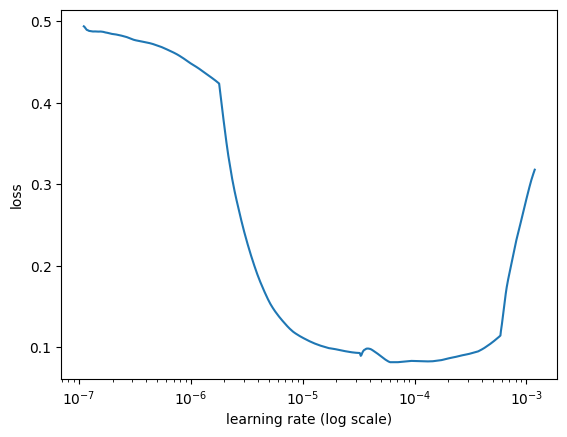

In [82]:
learner.lr_find(show_plot=True)

In [83]:
# Training Model for 5 Epoch
learner.fit_onecycle(lr = 1e-4, epochs=5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
291/291 [==============================] - 130s 402ms/step - loss: 0.1299 - accuracy: 0.9574 - val_loss: 0.1089 - val_accuracy: 0.9691
Epoch 2/5
291/291 [==============================] - 105s 363ms/step - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0869 - val_accuracy: 0.9787
Epoch 3/5
291/291 [==============================] - 105s 362ms/step - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0.1069 - val_accuracy: 0.9768
Epoch 4/5
291/291 [==============================] - 104s 357ms/step - loss: 0.1179 - accuracy: 0.9570 - val_loss: 0.0917 - val_accuracy: 0.9807
Epoch 5/5
291/291 [==============================] - 107s 368ms/step - loss: 0.3482 - accuracy: 0.8798 - val_loss: 0.3917 - val_accuracy: 0.8646


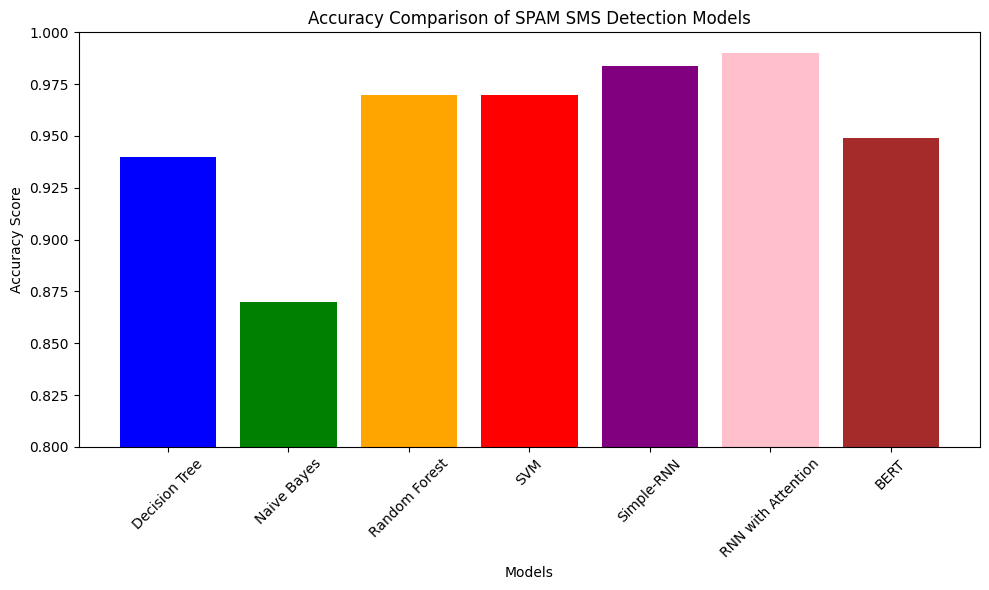

In [99]:
import matplotlib.pyplot as plt




# Model names and accuracy scores
models = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM', 'Simple-RNN', 'RNN with Attention', 'BERT']
accuracy_scores = [0.94, 0.87, 0.97, 0.97, 0.984, 0.99, 0.949]

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'brown']

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of SPAM SMS Detection Models')
plt.ylim(0.8, 1.0)  # Set y-axis range for better visualization
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()  # Adjust spacing
plt.show()

